In [1]:
import gym
import copy
import numpy as np
import time as time
import torch
import torch.nn as nn
import gym_flappyBird
import genetics as gen
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import math
import pygame
from pygame.locals import *

/home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and wi

# Maschine

<img src="sprites/bestaerkendes-lernen.png" align="left" >

## Feature extrahieren

<img src="sprites/ingame.jpg" align="left" >

In [2]:
def generateFeatures(state):
    bird = state['bird']
    #print(type(bird))
    posY = bird.Y
    speedY = bird.speedY
    pipes = state['pipes']
    #print(pipes[0].pos)
    return posY, speedY, pipes[0].pos,pipes[0].height,pipes[0].gap

# Neuronales Netz 

## Layer
nn.Linear(X, Y), Input dim X, Output dim Y

## Aktivierungsfunktionen
nn.ReLU()


nn.Sigmoid()


nn.Softmax(dim=1))



## Topologie
nn.Sequential(Layer, Aktivierungsfunktion, Layer, Aktivierungsfunktion...., Layer)
###### Beispiel
nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 1))

### https://pytorch.org/docs/stable/nn.html#linear-layers
### https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid


In [3]:
net = nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 5),nn.Sigmoid(), nn.Linear(5, 1))

In [4]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[-0.0174, -0.3313,  0.3018,  0.1937, -0.1393],
        [ 0.1556, -0.0603,  0.1314, -0.1750, -0.4364],
        [ 0.4424,  0.1048, -0.4146,  0.3414, -0.2125],
        [ 0.0257, -0.4098,  0.0154, -0.2275, -0.0952],
        [-0.3114, -0.3943,  0.1088, -0.2267, -0.4188]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.3676,  0.3385,  0.4322, -0.2710, -0.3589], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.0858,  0.1896, -0.0277, -0.2342, -0.3725],
        [-0.3311, -0.3802,  0.1792, -0.2173, -0.3238],
        [ 0.2789,  0.0688,  0.1107,  0.1822, -0.0950],
        [-0.1131, -0.4430, -0.0633, -0.1368,  0.3716],
        [-0.3593, -0.4055,  0.2001, -0.3014, -0.1384]], requires_grad=True)
2.bias Parameter containing:
tensor([ 0.0149, -0.1295,  0.3739, -0.0214, -0.4117], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.1851, -0.0983,  0.2066,  0.0608, -0.3978]], requires_grad=True)
4.bias Parameter containing:
tens

# Aktion festlegen

  
## Bird attributes

### bird.forceX 
### bird.forceY 

### bird.speedX  (default 20)
### bird.speedY

In [5]:
def birdAction(decission, bird):
        bird.forceY =50*decission[0]


## Reward  berechnen

<img src="sprites/ingame_2.jpg" align="left" >

In [6]:
def computeReward(state_old, state_new):
    return 1

# Mutationsparameter

<img src="sprites/ingame_3.jpg" align="left" >

In [7]:
POPULATION_SIZE = 50 #Anzahl der Vögel in der Population
PARENTS_COUNT = 10 #Anzahl der besten Vögel, aus denen dann mutiert wird
NOISE_STD = 0.1 #Mutationsstärke 

## Abstand zwischen den Pipes,  Höhe der Pipes, Grösse der Lücke

In [8]:
Interval_distance = [250, 350]
Interval_height = [100,300]
Interval_gap = [120,130]

## Max Score

In [9]:
Score_Max = 4000

/home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/mp

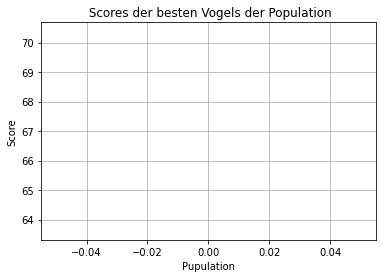

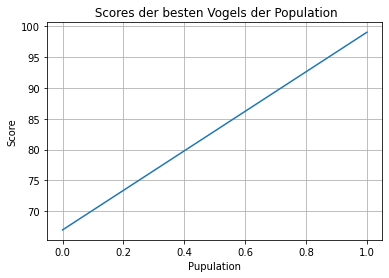

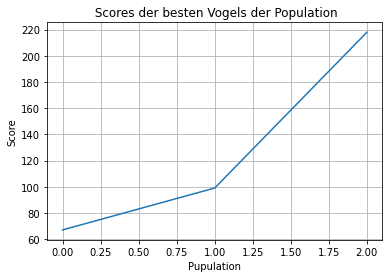

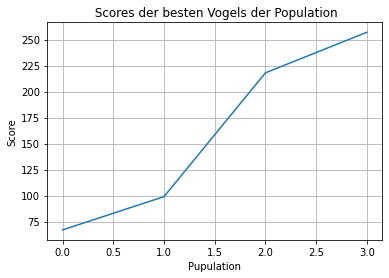

evaluaton


/home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/gym/core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "


----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  5
____________________________________________________________________________
Score Training:  259.0  Score Spiel:  221.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.0340, -0.1431,  0.2579,  0.1411, -0.1998],
        [ 0.1873, -0.0587,  0.0337,  0.1597, -0.3730],
        [ 0.0414,  0.3845, -0.5698,  0.2576,  0.1301],
        [ 0.1013, -0.4166,  0.4639,  0.0631,  0.0633],
        [-0.6008, -0.2836,  0.0556,  0.3343, -0.4277]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.3889,  0.3368,  0.3018, -0.4099, -0.0370], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.1198,  0.1576,  0.0194, -0.0476, -0.2946],
        [-0.3775, -0.7200,  0.0064, -0.1793, -0.4443],
        [ 0.5128,  0.0069, -0.1172,  0.1050,  0.0470],
       

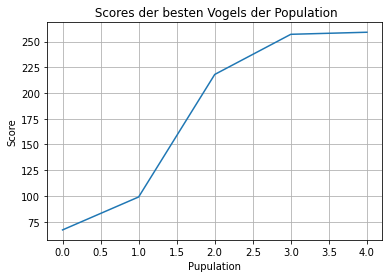

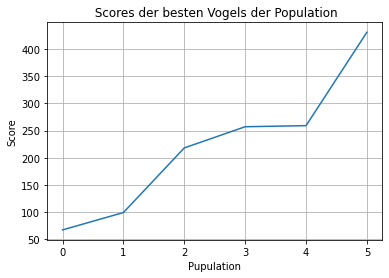

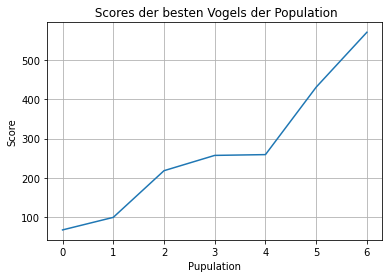

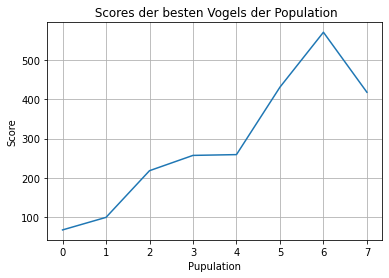

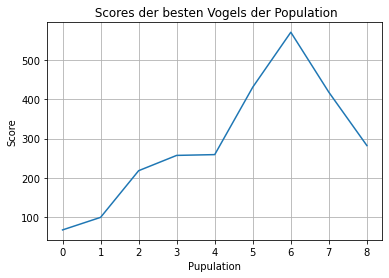

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  10
____________________________________________________________________________
Score Training:  270.0  Score Spiel:  120.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-0.3172, -0.4030,  0.5678, -0.1024, -0.1357],
        [ 0.4012, -0.3007,  0.5471,  0.1618, -0.1835],
        [ 0.3707, -0.0655, -1.0054, -0.0572, -0.1143],
        [ 0.3983, -0.0605, -0.2600, -0.8432, -0.2927],
        [-0.3580, -0.8512,  0.0975,  0.1397, -0.6457]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.7154,  0.1014,  1.0668,  0.0725, -0.8386], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.1599,  0.4297, -0.0028, -0.2070, -0.2006],
        [ 0.3068, -0.9380,  0.3339, -0.1826, -0.2128],
        [ 0.2890, -0.1667,  0.2180,  0.5345,  0.050

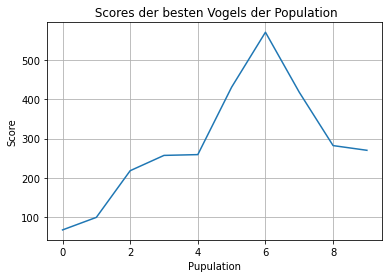

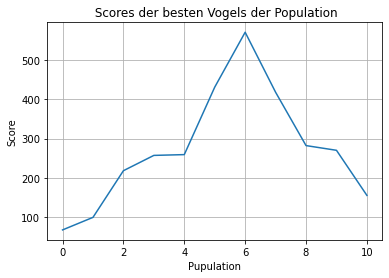

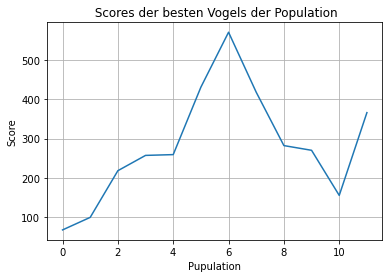

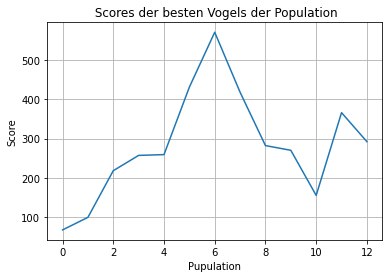

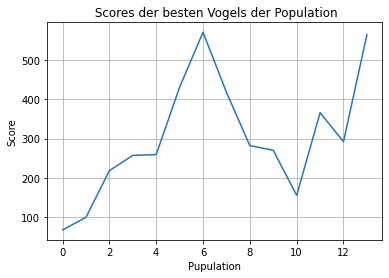

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  15
____________________________________________________________________________
Score Training:  409.0  Score Spiel:  369.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-0.2897, -0.1316,  0.8428,  0.1624,  0.2588],
        [ 0.6575, -0.3184,  0.7331,  0.3843, -0.6547],
        [ 0.1541, -0.0147, -0.9689,  0.2700, -0.1143],
        [ 0.2631, -0.2721, -0.4830, -0.9124, -0.0922],
        [-0.4228, -0.9249, -0.1064,  0.2140, -0.7395]], requires_grad=True)
0.bias Parameter containing:
tensor([ 1.0332,  0.0218,  1.3756,  0.0473, -0.7350], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.2042,  0.7872,  0.3879, -0.3596, -0.2311],
        [ 0.3715, -0.8927, -0.0229, -0.2223, -0.2981],
        [ 0.5086, -0.5652,  0.2987,  0.4257,  0.087

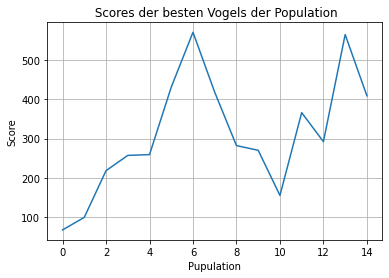

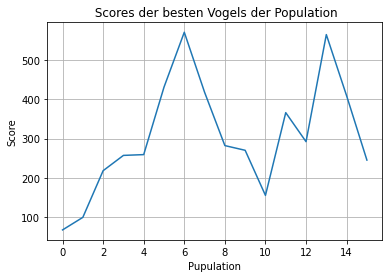

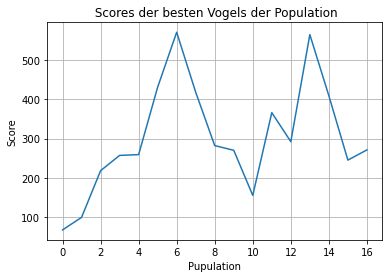

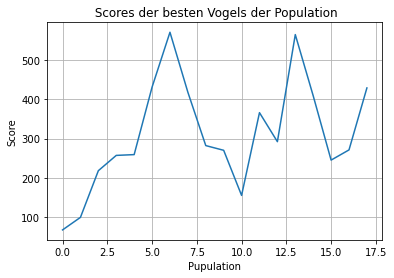

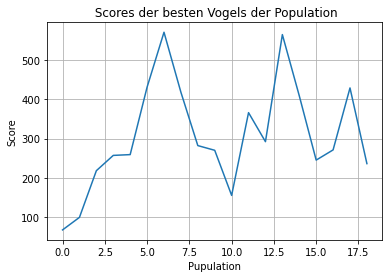

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  20
____________________________________________________________________________
Score Training:  239.0  Score Spiel:  83.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-0.0695, -0.2497,  0.4328,  0.3750,  0.0534],
        [ 0.7590, -0.3910,  0.8437,  0.3071, -0.5855],
        [ 0.2053, -0.1299, -0.9231, -0.0563, -0.3058],
        [ 0.4470, -0.5008, -0.5964, -0.6790, -0.1039],
        [-0.4006, -1.1104, -0.3280,  0.3193, -0.6677]], requires_grad=True)
0.bias Parameter containing:
tensor([ 1.2113,  0.1092,  1.1491,  0.2990, -0.7802], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.2531,  0.9863,  0.4285, -0.3758, -0.0152],
        [ 0.2926, -1.0055, -0.0346, -0.1514, -0.1558],
        [ 0.9185, -0.5989,  0.3000,  0.1325,  0.0653

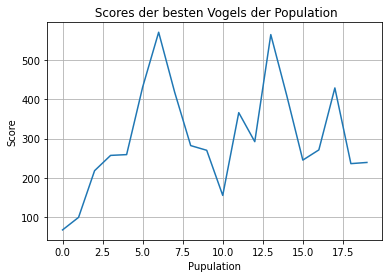

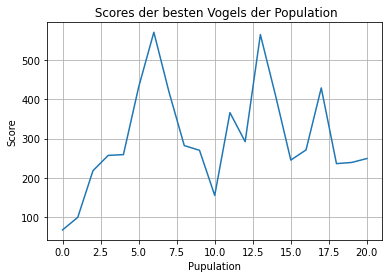

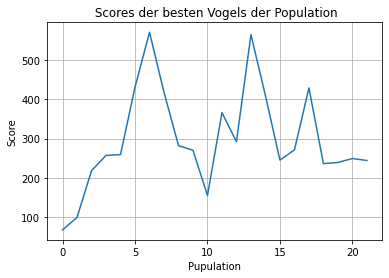

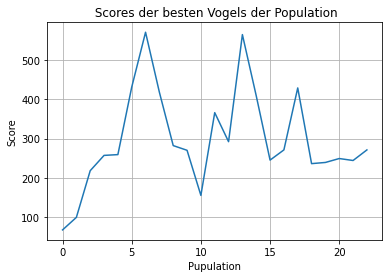

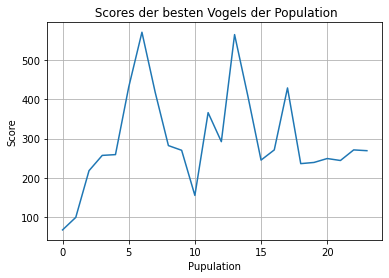

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  25
____________________________________________________________________________
Score Training:  253.0  Score Spiel:  86.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.3289, -0.5937,  1.0670,  0.1422,  0.2785],
        [ 1.0637, -0.2807,  0.3727,  0.2588, -0.5137],
        [ 0.1575, -0.5116, -1.3289,  0.3935, -0.2045],
        [ 0.2893, -0.3302, -0.4501, -0.6367, -0.2246],
        [-0.6208, -0.6561, -0.1111, -0.2346,  0.3395]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.4572, -0.6023,  1.3818,  0.5054, -0.0218], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.5755,  1.0444,  0.2271, -0.0184, -0.4625],
        [ 0.2422, -0.7973,  0.1083, -0.0885, -0.6169],
        [ 0.3611, -0.5274,  0.3161,  0.4427,  0.2852

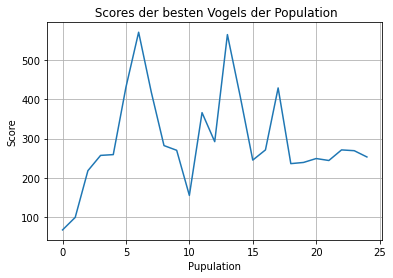

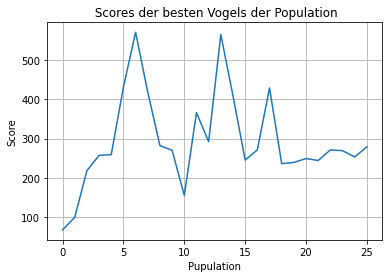

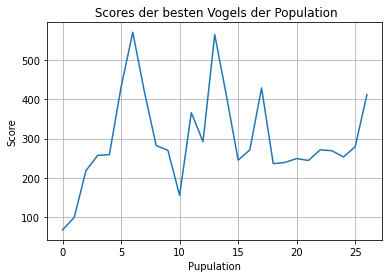

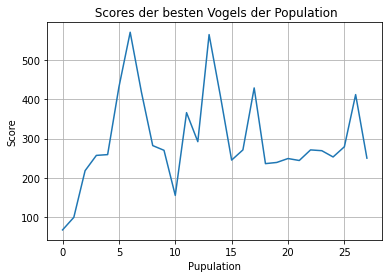

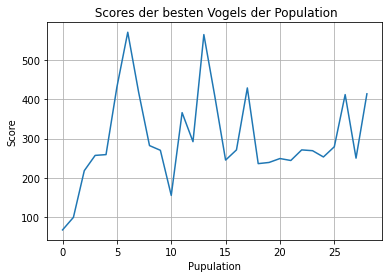

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  30
____________________________________________________________________________
Score Training:  426.0  Score Spiel:  97.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-0.6438, -0.2515,  0.3120,  0.0237,  0.6201],
        [-0.7025,  0.0533, -0.0670,  0.9288, -1.3881],
        [ 0.5136,  0.1057,  0.4830, -0.4216,  0.2832],
        [ 0.6206, -0.9425,  0.0127,  0.2301, -0.0757],
        [-0.2677,  0.9135, -1.2480, -0.0450,  0.0266]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.5489,  1.3038,  0.4385, -1.2556, -0.3065], requires_grad=True)
2.weight Parameter containing:
tensor([[-1.0726e-03,  5.7274e-02, -1.8768e+00, -7.6005e-01, -9.8977e-02],
        [-2.2833e-01, -1.2044e-01,  1.1219e-03, -8.3308e-01, -2.7667e-02],
        [-2.

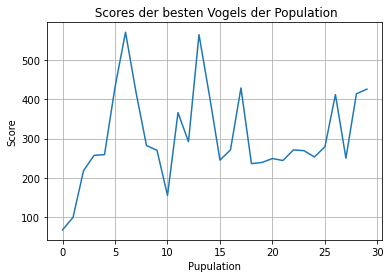

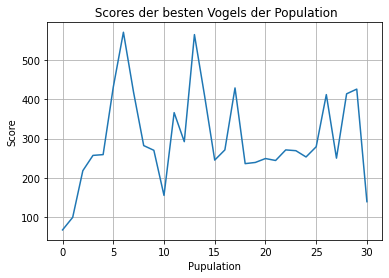

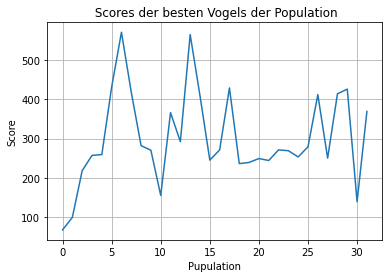

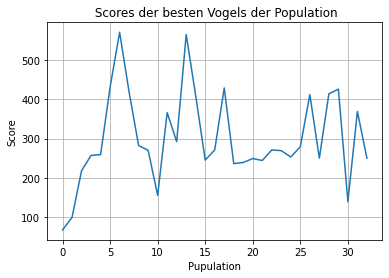

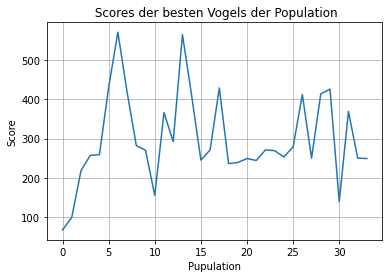

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  35
____________________________________________________________________________
Score Training:  398.0  Score Spiel:  71.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-0.5507, -0.2764,  0.6645,  0.1700,  0.6269],
        [-0.2077, -0.4214,  0.0576,  1.0012, -1.2986],
        [ 1.0595,  0.3203,  0.9075, -0.6352,  0.0158],
        [ 0.8821, -1.1258, -0.4794, -0.1924,  0.2672],
        [-0.4770,  1.5329, -1.2687,  0.0431,  0.5027]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.1629,  1.0842, -0.4280, -2.0168, -0.5487], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.0312, -0.7374, -1.8479, -0.9508,  0.1299],
        [-0.4200, -0.3052,  0.4990, -0.4340, -0.0235],
        [ 0.1946, -0.6359,  0.8621,  0.2991, -0.9180

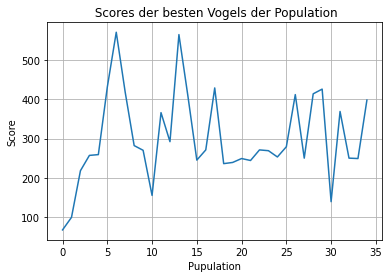

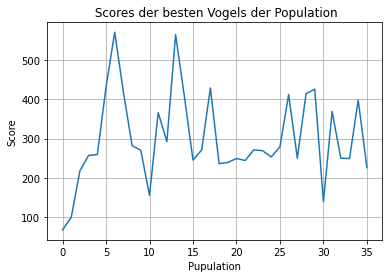

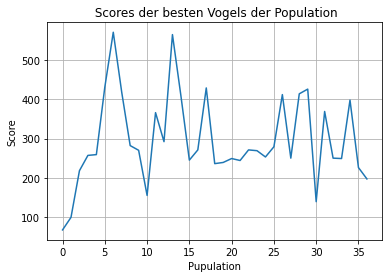

error: video system not initialized

In [10]:
fittestBirds = []

env = gym.make("scienceCampBird-v1")
env.setPipeIntervals([Interval_distance, Interval_height,Interval_gap])
population = gen.Population(POPULATION_SIZE, 5, 2, computeReward, net)
env.setAction(birdAction)
  #  print(len(population.nets))
population.evaluate_on_env(env,generateFeatures, Score_Max)
ecount = 0  
while True:
    population = gen.mutate_population(population, PARENTS_COUNT, NOISE_STD)
    population.evaluate_on_env(env, generateFeatures, Score_Max)
    fittestBirds.append(population.population[0])
    ecount +=1
    if(ecount % 5 == 0):
        print("evaluaton")
        net = population.population[0][1]
        score_e = population.population[0][0]
        score_p = env.playWithNet(net, generateFeatures, Score_Max, computeReward, ecount)
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', ecount)
        print("____________________________________________________________________________")
        print('Score Training: ', score_e, ' Score Spiel: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)
    scores = [score[0] for score in fittestBirds]
    fig, ax = plt.subplots()
    ax.plot(scores)

    ax.set(xlabel='Pupulation', ylabel='Score',
    title=' Scores der besten Vogels der Population')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

# Plott

In [ ]:
scores = [score[0] for score in fittestBirds]
fig, ax = plt.subplots()
ax.plot(scores)

ax.set(xlabel='Pupulation', ylabel='Score',
       title=' Scores der besten Vogels der Population')
ax.grid()

fig.savefig("test.png")
plt.show()

In [ ]:
i = 0
for bird in fittestBirds:
        i +=1
        net = bird[1]
        score_p = bird[0]
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', i)
        print("____________________________________________________________________________")
        print('Score: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

# Animation

Hintergrund: sprites/background-day.png

<img src="sprites/background-day.png" align="left" >

Bird: 

sprites/sparrow/sparrow.png, sprites/sparrow/sparrow_flap.png

<img src="sprites/sparrow/sparrow.png" align="left" >
<img src="sprites/sparrow/sparrow_flap.png" align="left" >